In [42]:
import sklearn 
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

## 회귀 분석용 샘플 데이터 소개

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
dfX = pd.DataFrame(boston.data,columns = boston.feature_names)
dfY = pd.DataFrame(boston.target, columns = ['MEDV'])

In [5]:
dfX.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [6]:
dfY.tail()

,MEDV
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


In [7]:
df = pd.concat([dfX,dfY],axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


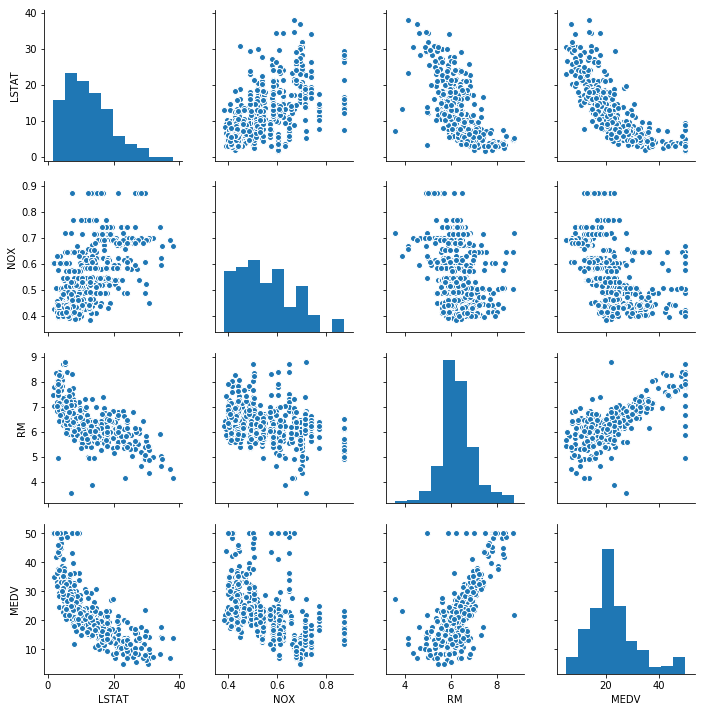

In [9]:
cols = ['LSTAT','NOX','RM','MEDV']
sns.pairplot(df[cols])
plt.show()

In [12]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data,columns = diabetes.feature_names),\
               pd.DataFrame(diabetes.target,columns = ['Y'])],axis = 1)
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [13]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


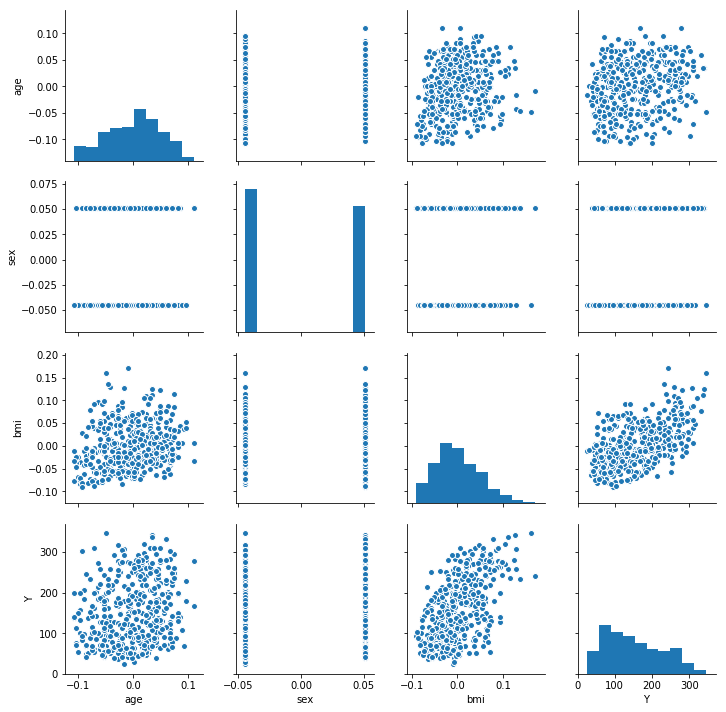

In [15]:
sns.pairplot(df[["age", "sex", "bmi", "Y"]])
plt.show()

In [16]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
print(linnerud.DESCR)

Linnerrud dataset

Notes
-----
Data Set Characteristics:
    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *exercise*: A list containing the following components: exercise data with
  20 observations on 3 exercise variables: Weight, Waist and Pulse.

- *physiological*: Data frame with 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

References
----------
  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.



In [18]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


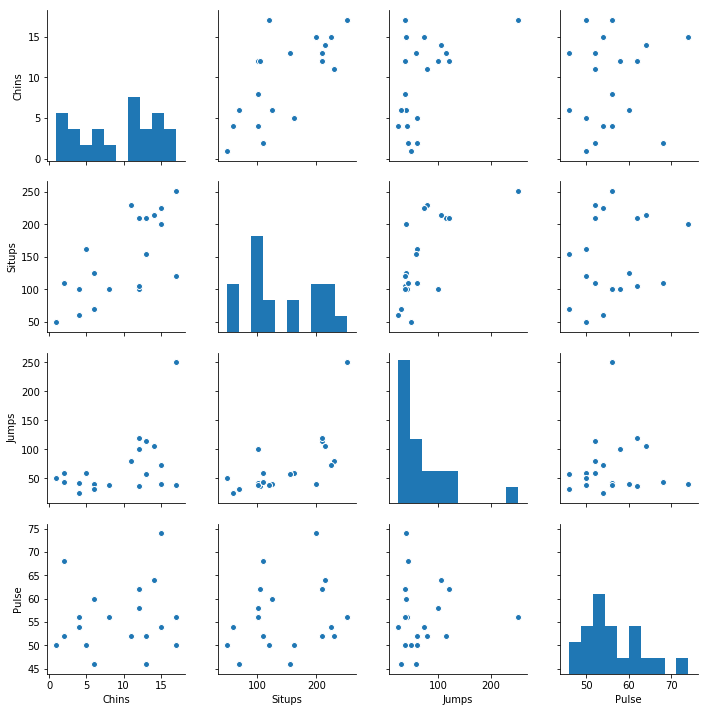

In [19]:
sns.pairplot(df.iloc[:,[0, 1, 2, -1]])
plt.show()

## 회귀 분석용 가상 데이터 생성 방법
- `make_regression()`
- 종속 변수 y 의 값이 독립 변수 x 벡터의 선형 조합인 선형 관계를 가진다. (b는 y intercept ,즉 bias 값이 된다.)
- noise component (or disturbance component) 는 종속 변수에 영향을 끼치는 요인들 중에서 우리가 고려하지 않는 것들의 영향을 모두 합친 것이라고 생각하면 된다.(trivial compoenent related to and impact on dependent variable). 이러한 노이즈 값들은 합친 값이기 때문에, Central limit theorem 에 따라서 normal distribution 의 분포를 띄게 된다.(그럴 가능성이 높다.) 따라서 noise(represented by epsilon) 은 보통 기댓값이 0이고 std 가 e 인 standard normal distribution의 random variable로 가정된다.
- linear regression equation : `y= b + w.T * x + e`
    - y : dependent variable ( what we want to know)
    - b : bias ( y intercept )
    - w : parameter of this equation ( weight)
    - x : independent variable ( dataset we have)
    - e : noise or disturbance (assume that follows normal distribution)
### input argument 
- X,y = make_regression(...)
- X,y,w = make_regression(..., coef = True, ...)
- n_samples : 정수 (옵션, 디폴트 100)
    - 표본 데이터의 갯수  N 
- n_features : 정수 (옵션, 디폴트 100)
    - 독립 변수(feature)의 수(차원)  M 
- n_targets : 정수 (옵션, 디폴트 1)
    - 종속 변수(target)의 수(차원)
- bias : 실수 (옵션, 디폴트 0.0)
    - y 절편
- noise : 실수 (옵션, 디폴트 0.0)
    - 출력 즉, 종속 변수에 더해지는 오차  ϵ 의 표준 편차
- coef : 불리언 (옵션, 디폴트 False)
    - True 이면 선형 모형의 계수도 출력
- random_state : 정수 (옵션, 디폴트 None)
    - 난수 발생용 시드값
## output
- X : [n_samples, n_features] 형상의 2차원 배열
    - 독립 변수의 표본 데이터 행렬  X 
- y : [n_samples] 형상의 1차원 배열 또는 [n_samples, n_targets] 형상의 2차원 배열
    - 종속 변수의 표본 데이터 벡터  y 
- coef : [n_features] 형상의 1차원 배열 또는 [n_features, n_targets] 형상의 2차원 배열 (옵션)
    - 선형 모형의 계수 벡터  w , 입력 인수 coef가 True 인 경우에만 출력됨


In [20]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=10, n_features=1, bias=0, noise=0,
                          coef=True, random_state=0)

In [21]:
X

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

In [22]:
y

array([ 77.48913677, 177.41712535, 147.85924209,  75.22087885,
       139.66444108,  32.50811146, -77.37353667,  31.6814481 ,
        -8.17209494, -11.98332915])

In [23]:
w

array(79.17250381)

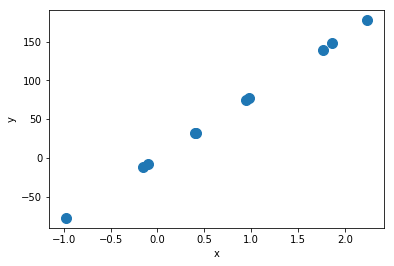

In [24]:
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

위의 make_regression 함수에서 noise, bias를 모두 0으로 설정하였으므로 modeling을 통해 만들어진 linear regression equation은 `y= 79.17250381 * x`이다. 

In [26]:
X,y,w = make_regression(n_samples=300, n_features=2,noise=10\
                        ,coef=True,random_state=0)

In [36]:
len(X[:,0])
len(X[:,1])

300

In [39]:
len(y)

300

In [40]:
w

array([24.65569398, 56.82175937])

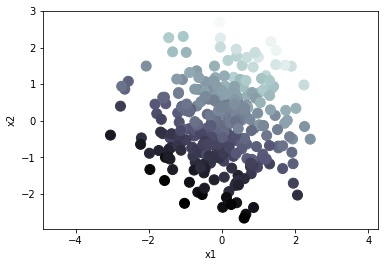

In [44]:
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.show()

- make_regression 명령은 위에서 설명한 인수 이외에도 다음과 같은 인수를 가질 수 있다.

    - n_informative : 정수 (옵션, 디폴트 10)
        - 독립 변수(feature) 중 실제로 종속 변수와 상관 관계가 있는 독립 변수의 수(차원)
    - effective_rank: 정수 또는 None (옵션, 디폴트 None)
        - 독립 변수(feature) 중 서로 독립인 독립 변수의 수. 만약 None이면 모두 독립
    - tail_strength : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
        - effective_rank가 None이 아닌 경우 독립 변수간의 상관관계를 결정하는 변수. 0.5면 독립 변수간의 상관관계가 없다.

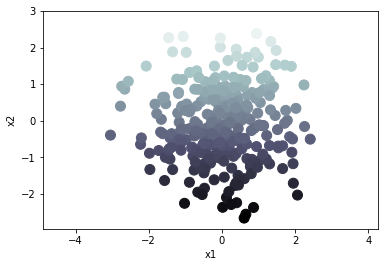

In [46]:
X,y,w = make_regression(n_samples = 300, n_features =2, \
                       n_informative =1, noise =0, coef = True, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()
#  해당 command 에서는 n-informative를 1로 설정해놓으므로써, 2가지 입력 변수에서
# 한 가지 입력변수만 y값에 상관성이 있음으로 할당해주었다.

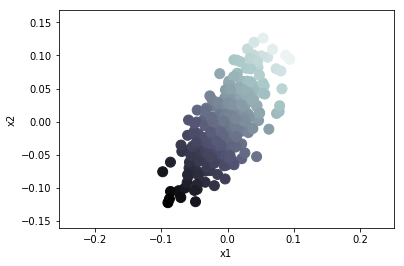

In [47]:
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, 
                          tail_strength=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

두 독립 변수간의 상관관계를 증가시키고 싶다면 다음처럼 tail_strength를 0에 가까운 값으로 설정해주면 된다.